1) Prepare a classification model using Naive Bayes
for salary data <BR>

Data Description:<br>

* age -- age of a person
* workclass	-- A work class is a grouping of work
* education	-- Education of an individuals
* maritalstatus -- Marital status of an individulas
* occupation	 -- occupation of an individuals
* relationship --
* race --  Race of an Individual
* sex --  Gender of an Individual
* capitalgain --  profit received from the sale of an investment
* capitalloss	-- A decrease in the value of a capital asset
* hoursperweek -- number of hours work per week
* native -- Native of an individual
* Salary -- salary of an individual




In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score



In [46]:
traindata=pd.read_csv('SalaryData_Train.csv')
testdata=pd.read_csv('SalaryData_Test.csv')

In [47]:
traindata

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [48]:
testdata

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [5]:
#Combination of train and test data
data=traindata.append(testdata)
data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9311,38,Private,HS-grad,9.0,Separated,Machine-op-inspct,Unmarried,White,Female,0.0,0.0,40.0,United-States,<=50K
9312,44,Private,HS-grad,9.0,Married-civ-spouse,Adm-clerical,Husband,White,Male,0.0,0.0,40.0,United-States,<=50K
9313,45,Private,Bachelors,13.0,Married-civ-spouse,Adm-clerical,Husband,White,Male,7688.0,0.0,50.0,United-States,>50K
9314,32,Private,HS-grad,9.0,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0.0,0.0,40.0,United-States,<=50K


In [6]:
data.shape

(18640, 14)

In [7]:
#Reseting index values
data.reset_index(inplace=True,drop=True)

In [8]:
data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18635,38,Private,HS-grad,9.0,Separated,Machine-op-inspct,Unmarried,White,Female,0.0,0.0,40.0,United-States,<=50K
18636,44,Private,HS-grad,9.0,Married-civ-spouse,Adm-clerical,Husband,White,Male,0.0,0.0,40.0,United-States,<=50K
18637,45,Private,Bachelors,13.0,Married-civ-spouse,Adm-clerical,Husband,White,Male,7688.0,0.0,50.0,United-States,>50K
18638,32,Private,HS-grad,9.0,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0.0,0.0,40.0,United-States,<=50K


## EDA

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18640 entries, 0 to 18639
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            18640 non-null  int64  
 1   workclass      18640 non-null  object 
 2   education      18640 non-null  object 
 3   educationno    18639 non-null  float64
 4   maritalstatus  18639 non-null  object 
 5   occupation     18639 non-null  object 
 6   relationship   18639 non-null  object 
 7   race           18639 non-null  object 
 8   sex            18639 non-null  object 
 9   capitalgain    18639 non-null  float64
 10  capitalloss    18638 non-null  float64
 11  hoursperweek   18638 non-null  float64
 12  native         18638 non-null  object 
 13  Salary         18638 non-null  object 
dtypes: float64(4), int64(1), object(9)
memory usage: 2.0+ MB


In [10]:
# Numerical Columns=['age','educationno', 'capitalgain','capitalloss', 'hoursperweek']

#Categorical Columns=['workclass','education','maritalstatus','occupation','relationship','race','sex','native','Salary']

Understanding Numerical features

In [11]:
#Numerical column description

data.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,18640.000000,18639.000000,18639.000000,18638.000000,18638.000000
mean,38.518991,10.114491,1141.486721,89.313231,41.054137
std,13.248234,2.545895,7830.282831,405.257122,11.970879
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


In [12]:
data.corr()

,age,educationno,capitalgain,capitalloss,hoursperweek
age,1.000000,0.024353,0.076429,0.058899,0.107736
educationno,0.024353,1.000000,0.131085,0.083275,0.138677
capitalgain,0.076429,0.131085,1.000000,-0.032130,0.087970
capitalloss,0.058899,0.083275,-0.032130,1.000000,0.064075
hoursperweek,0.107736,0.138677,0.087970,0.064075,1.000000


<Axes: >

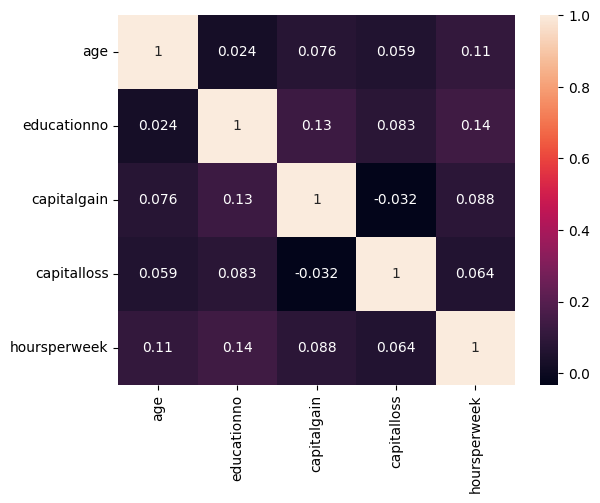

In [13]:
sns.heatmap(data=data.corr(),annot=True)

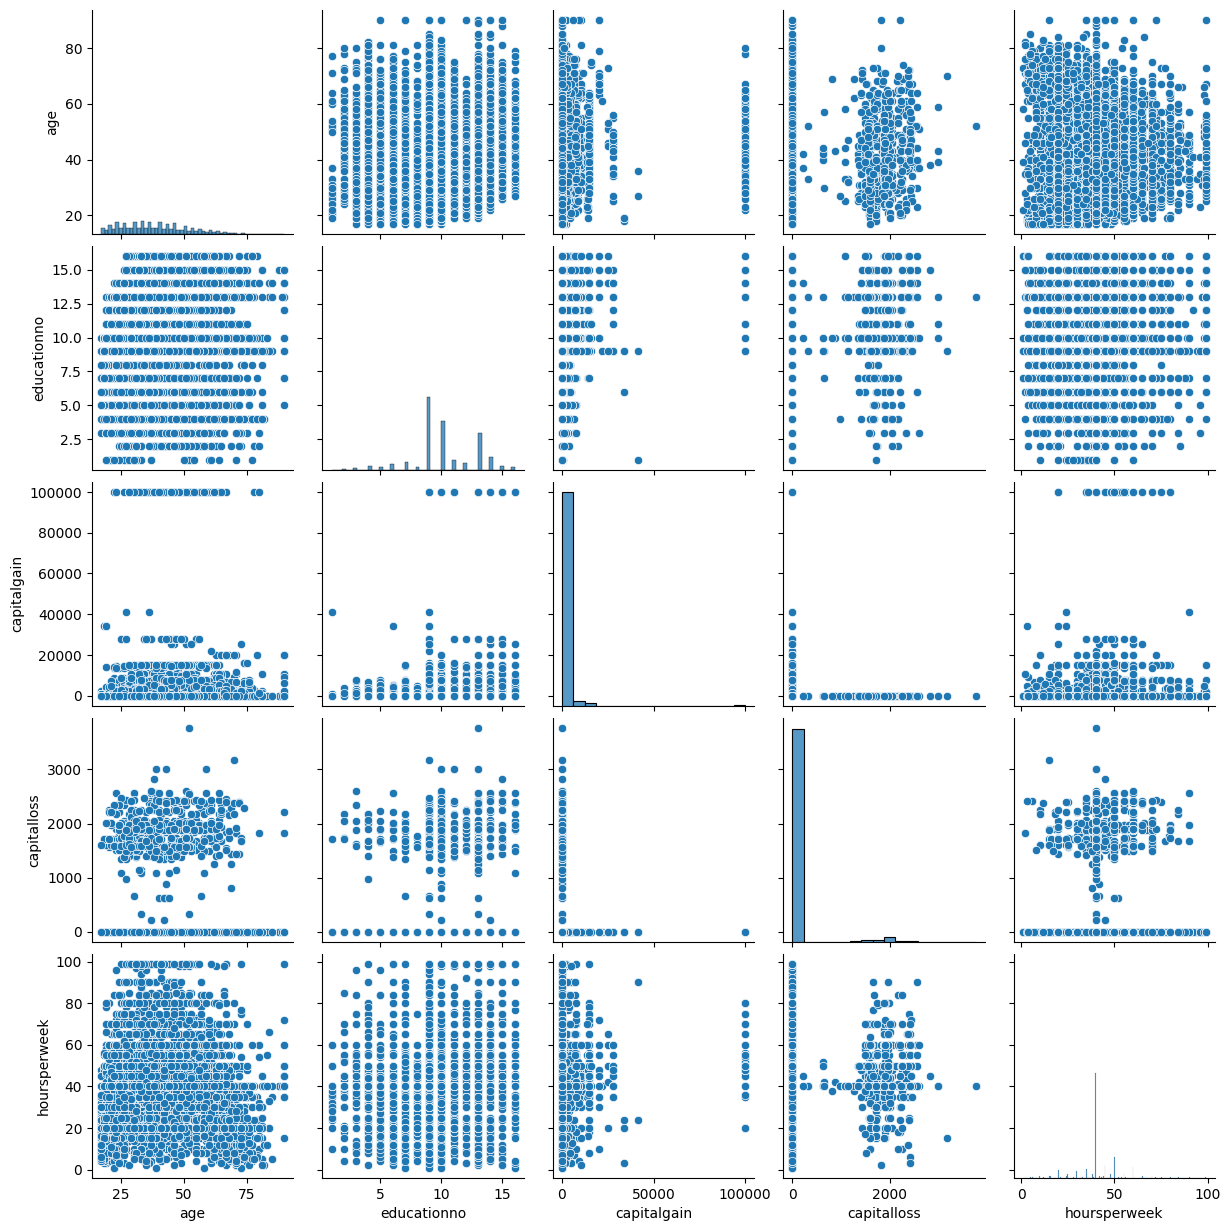

In [14]:
sns.pairplot(data)

Comment<br>
* None of the numerical feature is correlated to each other
* There is no significant relationship between the features

Exploring Categorical columns

In [15]:
categorical_features=['workclass','education','maritalstatus','occupation','relationship','race','sex','native']

for i in categorical_features:

  print(f'Column :- {i} ')
  print(i, ' contains ', len(data[i].unique()), ' labels')
  print(data[i].value_counts())
  print('\n\n')

Column :- workclass 
workclass  contains  7  labels
 Private             13672
 Self-emp-not-inc     1603
 Local-gov            1274
 State-gov             833
 Self-emp-inc          700
 Federal-gov           552
 Without-pay             6
Name: workclass, dtype: int64



Column :- education 
education  contains  17  labels
 HS-grad         6096
 Some-college    4100
 Bachelors       3119
 Masters         1056
 Assoc-voc        804
 11th             670
 Assoc-acdm       610
 10th             520
 7th-8th          350
 Prof-school      315
 9th              284
 12th             216
 Doctorate        210
 5th-6th          172
 1st-4th           89
 Preschool         28
 Some-              1
Name: education, dtype: int64



Column :- maritalstatus 
maritalstatus  contains  8  labels
 Married-civ-spouse       8598
 Never-married            6063
 Divorced                 2604
 Separated                 593
 Widowed                   537
 Married-spouse-absent     230
 Married-AF-spouse  

In [16]:
data['Salary'].value_counts()

 <=50K    14067
 >50K      4571
Name: Salary, dtype: int64

Comment:<br>
* Data is imbalanced

In [17]:
countunder50=len(data[data.Salary == ' >50K'])
countover50=len(data[data.Salary == ' <=50K'])
print('countunder50 =',countunder50)
print('countover50',countover50)
print('length of data',len(data))

countunder50 = 4571
countover50 14067
length of data 18640


In [18]:
print('Percentage of employees having salary greater than 50k: {:.2f}%'.format((countover50/len(data))*100))
print('Percentage of employees having salary lesser than 50k: {:.2f}%'.format((countunder50/len(data))*100))

Percentage of employees having salary greater than 50k: 75.47%
Percentage of employees having salary lesser than 50k: 24.52%


In [19]:
#Let us check for duplicate values

data[data.duplicated()]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
326,33,Private,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
364,27,Private,Bachelors,13.0,Never-married,Craft-repair,Not-in-family,White,Male,0.0,0.0,50.0,United-States,<=50K
518,24,Private,HS-grad,9.0,Never-married,Handlers-cleaners,Unmarried,Black,Female,0.0,0.0,40.0,United-States,<=50K
525,24,Private,HS-grad,9.0,Never-married,Craft-repair,Own-child,White,Male,0.0,0.0,40.0,United-States,<=50K
619,33,Private,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18619,29,Private,Some-college,10.0,Married-civ-spouse,Craft-repair,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
18620,40,Private,HS-grad,9.0,Married-civ-spouse,Craft-repair,Husband,White,Male,0.0,0.0,40.0,United-States,<=50K
18621,55,Private,HS-grad,9.0,Married-civ-spouse,Transport-moving,Husband,White,Male,0.0,0.0,40.0,United-States,<=50K
18622,19,Private,Some-college,10.0,Never-married,Sales,Own-child,White,Female,0.0,0.0,20.0,United-States,<=50K


In [20]:
data.isna().sum()

age              0
workclass        0
education        0
educationno      1
maritalstatus    1
occupation       1
relationship     1
race             1
sex              1
capitalgain      1
capitalloss      2
hoursperweek     2
native           2
Salary           2
dtype: int64

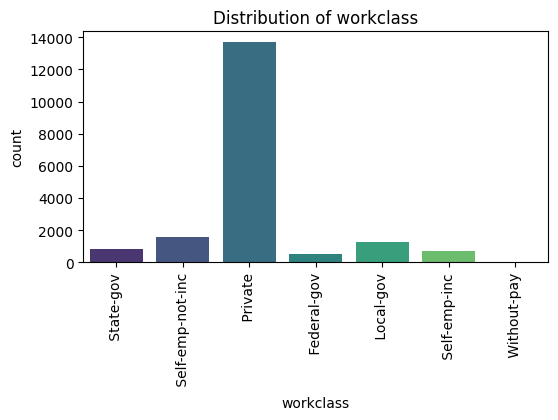

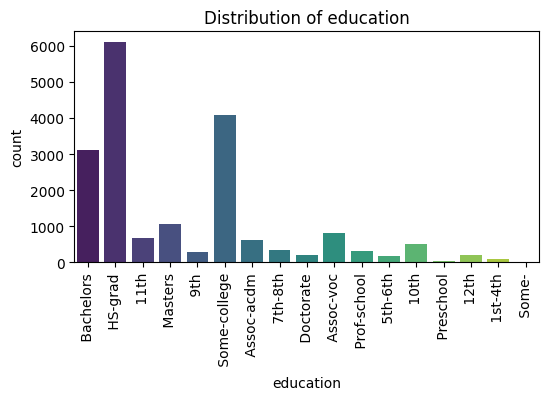

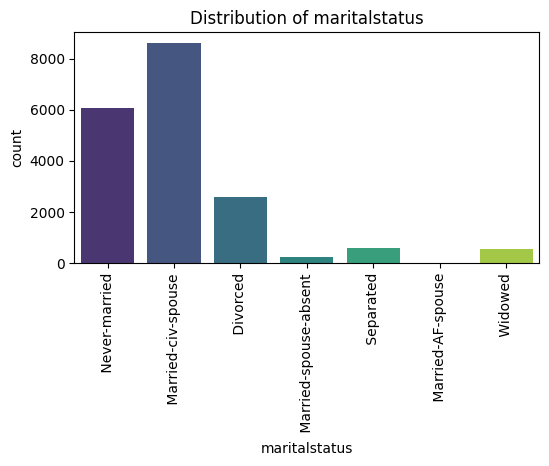

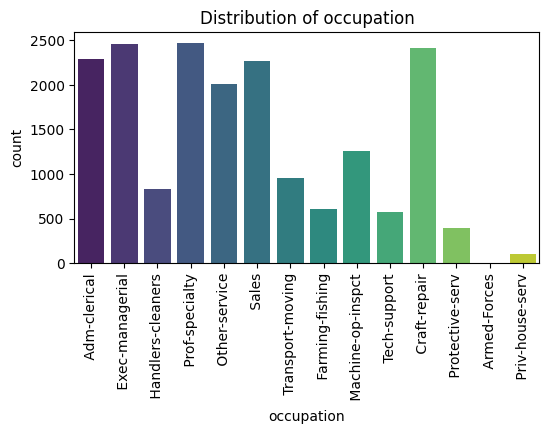

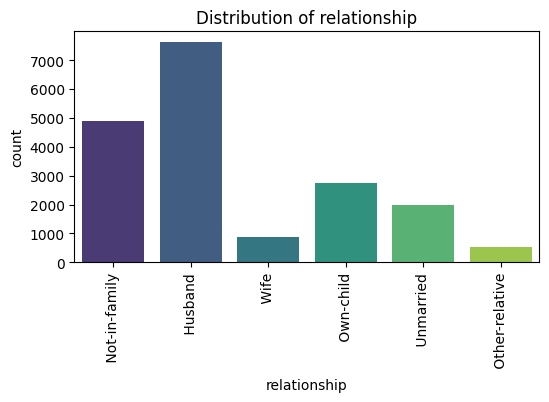

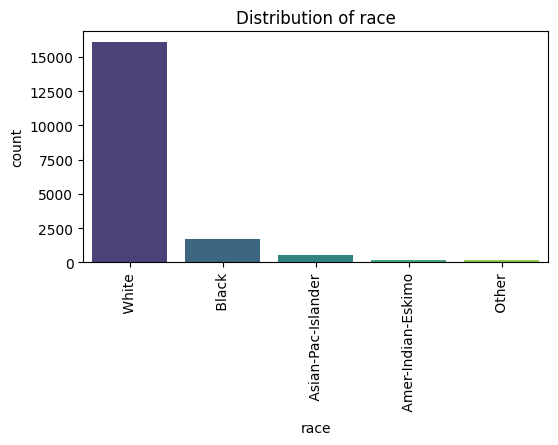

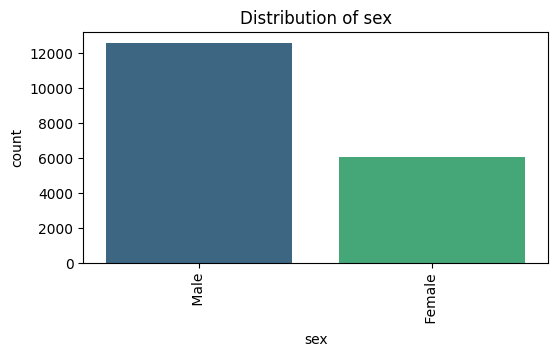

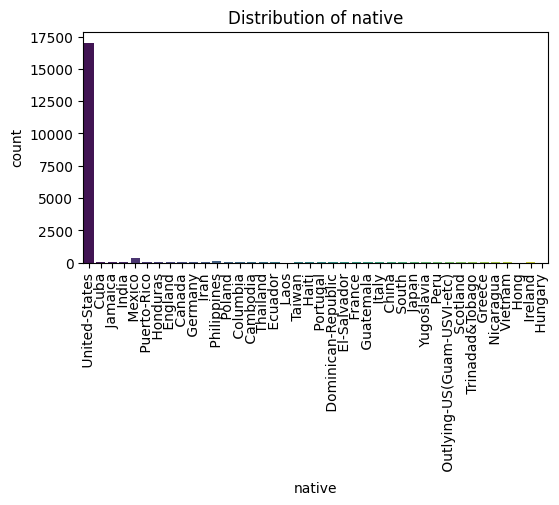

In [21]:
categorical_features=['workclass','education','maritalstatus','occupation','relationship','race','sex','native']

for i in categorical_features:
  plt.figure(figsize=(6,3))
  sns.countplot(x=i,data=data,palette='viridis')
  plt.title(f'Distribution of {i}')
  plt.xticks(rotation=90)
  plt.show()

Determining how each numerical column is impacting target variable


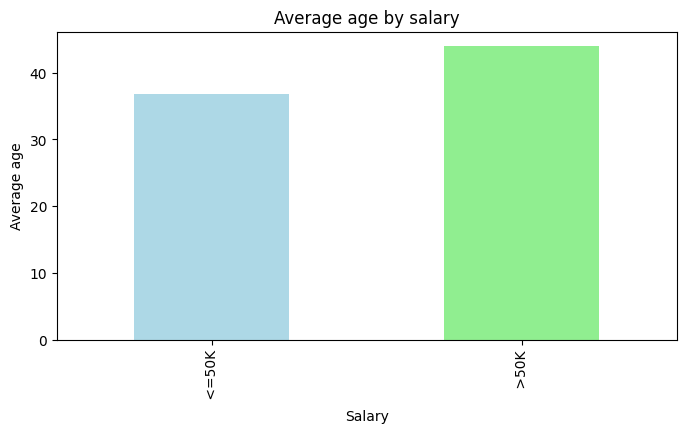

In [22]:
age_by_salary=data.groupby('Salary')['age'].mean()
plt.figure(figsize=(8,4))
age_by_salary.plot(kind='bar',color=['lightblue','lightgreen'])
plt.xlabel('Salary')
plt.ylabel('Average age')
plt.title('Average age by salary');


Text(0.5, 1.0, 'Salary versus educationno')

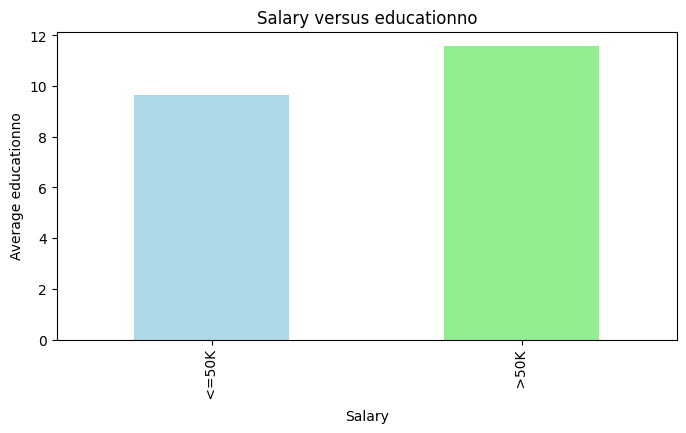

In [23]:
educationno_by_salary=data.groupby('Salary')['educationno'].mean()
plt.figure(figsize=(8,4))
educationno_by_salary.plot(kind='bar',color=['lightblue','lightgreen'])
plt.xlabel('Salary')
plt.ylabel('Average educationno')
plt.title('Salary versus educationno')

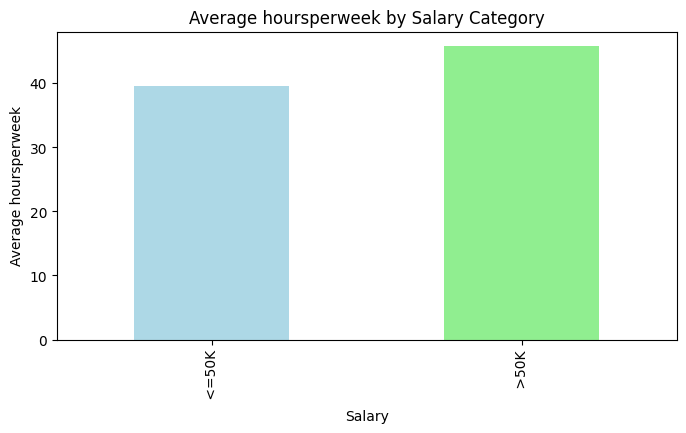

In [24]:
hoursperweek_by_salary = data.groupby("Salary")["hoursperweek"].mean()

plt.figure(figsize=(8,4))
hoursperweek_by_salary.plot(kind="bar", color=["lightblue", "lightgreen"])
plt.xlabel("Salary")
plt.ylabel("Average hoursperweek")
plt.title("Average hoursperweek by Salary Category");

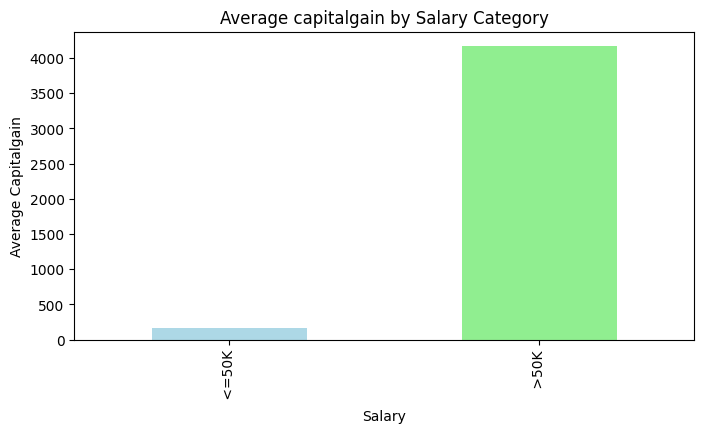

In [25]:
capitalgain_by_salary = data.groupby("Salary")["capitalgain"].mean()

plt.figure(figsize=(8,4))
capitalgain_by_salary.plot(kind="bar", color=["lightblue", "lightgreen"])
plt.xlabel("Salary")
plt.ylabel("Average Capitalgain")
plt.title("Average capitalgain by Salary Category");

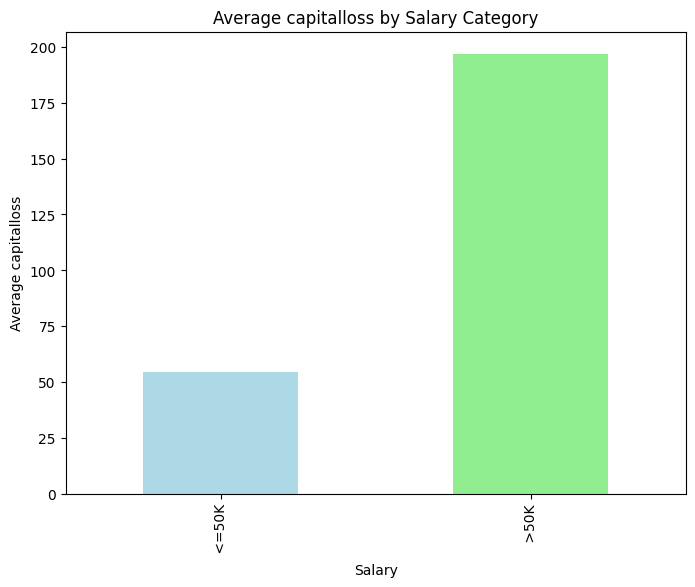

In [26]:
capitalloss_by_salary = data.groupby("Salary")["capitalloss"].mean()

plt.figure(figsize=(8, 6))
capitalloss_by_salary.plot(kind="bar", color=["lightblue", "lightgreen"])
plt.xlabel("Salary")
plt.ylabel("Average capitalloss")
plt.title("Average capitalloss by Salary Category");

Data preprocessing


In [49]:
#building the model on training dataset

traindata

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [50]:
label_encoder=LabelEncoder()

In [51]:
traindata["education"]=label_encoder.fit_transform(traindata["education"])
traindata["workclass"]=label_encoder.fit_transform(traindata["workclass"])
traindata["maritalstatus"]=label_encoder.fit_transform(traindata["maritalstatus"])
traindata["sex"]=label_encoder.fit_transform(traindata["sex"])
traindata["race"]=label_encoder.fit_transform(traindata["race"])
traindata["occupation"]=label_encoder.fit_transform(traindata["occupation"])
traindata["relationship"]=label_encoder.fit_transform(traindata["relationship"])
traindata["native"]=label_encoder.fit_transform(traindata["native"])
traindata['Salary'] = np.where(traindata['Salary'].str.contains(" >50K"), 1, 0)

In [52]:
traindata

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,2,7,12,2,12,5,4,0,0,0,38,37,0
30157,40,2,11,9,2,6,0,4,1,0,0,40,37,1
30158,58,2,11,9,6,0,4,4,0,0,0,40,37,0
30159,22,2,11,9,4,0,3,4,1,0,0,20,37,0


In [53]:
traindata.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [54]:
x_train=traindata.iloc[:,:-1]
y_train=traindata['Salary']

In [70]:
#Model  building

from sklearn.naive_bayes import MultinomialNB as MB
from sklearn.naive_bayes import CategoricalNB      #for categorical classification
from sklearn.naive_bayes import BernoulliNB       # Suitable for binary data, often used in text classification where features represent the presence or absence of words.

In [56]:
model=CategoricalNB()
model.fit(x_train,y_train)

CategoricalNB()

In [66]:
pred_train=model.predict(x_train)

In [68]:
#Accuracy for training dataset

print(accuracy_score(y_train,pred_train))

0.8571002287722556


In [57]:
testdata

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [58]:
testdata["education"]=label_encoder.fit_transform(testdata["education"])
testdata["workclass"]=label_encoder.fit_transform(testdata["workclass"])
testdata["maritalstatus"]=label_encoder.fit_transform(testdata["maritalstatus"])
testdata["sex"]=label_encoder.fit_transform(testdata["sex"])
testdata["race"]=label_encoder.fit_transform(testdata["race"])
testdata["occupation"]=label_encoder.fit_transform(testdata["occupation"])
testdata["relationship"]=label_encoder.fit_transform(testdata["relationship"])
testdata["native"]=label_encoder.fit_transform(testdata["native"])
testdata['Salary'] = np.where(testdata['Salary'].str.contains(" >50K"), 1, 0)

In [60]:
x_test =testdata.iloc[:,:-1]
y_test =testdata["Salary"]

In [64]:
#making prediction on test data

pred=model.predict(x_test)

In [65]:
#Accuracy score
print(accuracy_score(y_test,pred))

0.8566401062416998


In [71]:
model1= BernoulliNB()
model1.fit(x_train,y_train)

BernoulliNB()

In [72]:
#making prediction on training data

pred_train1=model1.predict(x_train)

In [73]:
#Accuracy score for training dataset
print(accuracy_score(y_train,pred_train1))

0.7255727595238884


In [74]:
#making prediction on testinng data
pred_test1=model1.predict(x_test)

#Accuracy score for testing dataset
print(accuracy_score(y_test,pred_test1))

0.7284196547144755


### Model is performing good with CategoricalNB